# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

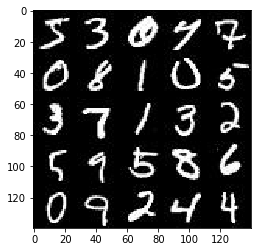

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

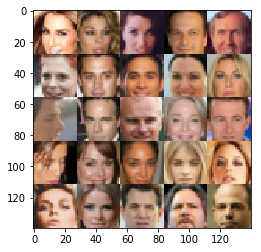

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\dilip\Anaconda3\envs\dlndmaster\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    lr = tf.placeholder(tf.float32, name="learning_rate")

    return input_real, input_z, lr



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse=reuse):
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding="same")
        x1 = tf.maximum(alpha*x1, x1)
        
        x2 = tf.layers.conv2d(x1, 64, 5, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d(x2, 128, 5, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        
        x4 = tf.layers.conv2d(x3, 256, 5, strides=2, padding="same")
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha*x4, x4)
        
        x4 = tf.reshape(x3, (-1, 2*2*256))
        logits = tf.layers.dense(x4, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        h1 = tf.layers.dense(z, units=4*4*512)
        h1 = tf.reshape(h1, (-1, 4, 4, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum( 0.2 * h1, h1)
        
        h2 = tf.layers.conv2d_transpose(h1, filters=128, kernel_size=4, strides=1, padding='valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(0.2 * h2, h2)
        
        h3 = tf.layers.conv2d_transpose(h2, filters=64, kernel_size=5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        
        h3 = tf.layers.conv2d_transpose(h3, filters=32, kernel_size=5, strides=2, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        
        logits = tf.layers.conv2d_transpose(h3, filters=out_channel_dim, kernel_size=3, strides=1, padding='same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z, out_channel_dim)
    disc_model_real, disc_logits_real = discriminator(input_real)
    disc_model_fake, disc_logits_fake = discriminator(gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real,
                                                                           labels=tf.ones_like(disc_model_real)*(1-0.1)))
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                           labels=tf.zeros_like(disc_model_fake)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                     labels=tf.ones_like(disc_model_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    gen_vars = [x for x in train_vars if x.name.startswith('generator')]
    disc_vars = [x for x in train_vars if x.name.startswith('discriminator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
    return disc_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_every = 100
    step = 0
    
    samples, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()

    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                 # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                steps += 1
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.9023... Generator Loss: 0.3411
Epoch 1/2... Discriminator Loss: 1.4563... Generator Loss: 0.5542
Epoch 1/2... Discriminator Loss: 1.2001... Generator Loss: 0.8034
Epoch 1/2... Discriminator Loss: 1.4424... Generator Loss: 0.6889
Epoch 1/2... Discriminator Loss: 1.7123... Generator Loss: 0.6313
Epoch 1/2... Discriminator Loss: 1.4988... Generator Loss: 0.7642
Epoch 1/2... Discriminator Loss: 1.4061... Generator Loss: 0.8356
Epoch 1/2... Discriminator Loss: 1.3457... Generator Loss: 0.7624
Epoch 1/2... Discriminator Loss: 1.0396... Generator Loss: 1.0732
Epoch 1/2... Discriminator Loss: 0.7374... Generator Loss: 1.5390


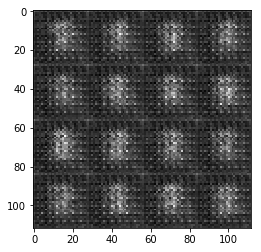

Epoch 1/2... Discriminator Loss: 0.9443... Generator Loss: 1.2817
Epoch 1/2... Discriminator Loss: 0.8144... Generator Loss: 1.3572
Epoch 1/2... Discriminator Loss: 1.0539... Generator Loss: 1.0629
Epoch 1/2... Discriminator Loss: 1.0926... Generator Loss: 1.1082
Epoch 1/2... Discriminator Loss: 1.0076... Generator Loss: 1.0993
Epoch 1/2... Discriminator Loss: 1.4907... Generator Loss: 0.7936
Epoch 1/2... Discriminator Loss: 1.3300... Generator Loss: 0.9171
Epoch 1/2... Discriminator Loss: 1.2312... Generator Loss: 0.9876
Epoch 1/2... Discriminator Loss: 1.0190... Generator Loss: 1.0668
Epoch 1/2... Discriminator Loss: 1.0989... Generator Loss: 1.0024


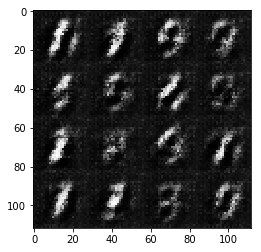

Epoch 1/2... Discriminator Loss: 0.9918... Generator Loss: 1.1695
Epoch 1/2... Discriminator Loss: 1.2193... Generator Loss: 0.8718
Epoch 1/2... Discriminator Loss: 1.2730... Generator Loss: 0.9348
Epoch 1/2... Discriminator Loss: 1.3526... Generator Loss: 0.7846
Epoch 1/2... Discriminator Loss: 1.2575... Generator Loss: 1.0714
Epoch 1/2... Discriminator Loss: 1.2525... Generator Loss: 0.9910
Epoch 1/2... Discriminator Loss: 1.1372... Generator Loss: 1.1074
Epoch 1/2... Discriminator Loss: 1.2855... Generator Loss: 0.7596
Epoch 1/2... Discriminator Loss: 1.2156... Generator Loss: 0.8252
Epoch 1/2... Discriminator Loss: 1.1584... Generator Loss: 0.9535


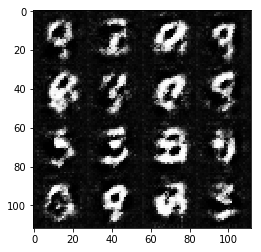

Epoch 1/2... Discriminator Loss: 1.2129... Generator Loss: 0.9232
Epoch 1/2... Discriminator Loss: 1.2597... Generator Loss: 0.8802
Epoch 1/2... Discriminator Loss: 1.1700... Generator Loss: 0.8904
Epoch 1/2... Discriminator Loss: 1.2122... Generator Loss: 0.8466
Epoch 1/2... Discriminator Loss: 1.1555... Generator Loss: 0.9756
Epoch 1/2... Discriminator Loss: 1.1875... Generator Loss: 0.9098
Epoch 1/2... Discriminator Loss: 1.3083... Generator Loss: 1.4603
Epoch 1/2... Discriminator Loss: 1.1442... Generator Loss: 1.0175
Epoch 1/2... Discriminator Loss: 1.1554... Generator Loss: 1.1212
Epoch 1/2... Discriminator Loss: 1.2171... Generator Loss: 0.7515


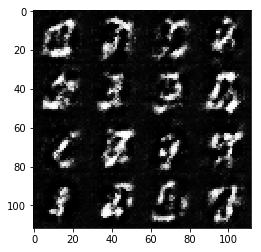

Epoch 1/2... Discriminator Loss: 1.1845... Generator Loss: 0.7870
Epoch 1/2... Discriminator Loss: 1.1129... Generator Loss: 1.1137
Epoch 1/2... Discriminator Loss: 1.1456... Generator Loss: 1.0205
Epoch 1/2... Discriminator Loss: 1.0907... Generator Loss: 1.0372
Epoch 1/2... Discriminator Loss: 1.0891... Generator Loss: 1.2523
Epoch 1/2... Discriminator Loss: 1.0831... Generator Loss: 1.0114
Epoch 1/2... Discriminator Loss: 1.1543... Generator Loss: 0.8109
Epoch 1/2... Discriminator Loss: 1.0891... Generator Loss: 1.0405
Epoch 1/2... Discriminator Loss: 1.0566... Generator Loss: 1.0202
Epoch 1/2... Discriminator Loss: 1.0772... Generator Loss: 1.1048


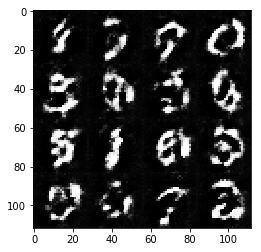

Epoch 1/2... Discriminator Loss: 1.2015... Generator Loss: 1.3536
Epoch 1/2... Discriminator Loss: 1.1092... Generator Loss: 0.8832
Epoch 1/2... Discriminator Loss: 1.0938... Generator Loss: 1.0991
Epoch 1/2... Discriminator Loss: 1.0266... Generator Loss: 1.1763
Epoch 1/2... Discriminator Loss: 1.1087... Generator Loss: 1.4015
Epoch 1/2... Discriminator Loss: 1.2510... Generator Loss: 0.7002
Epoch 1/2... Discriminator Loss: 1.2198... Generator Loss: 0.6727
Epoch 1/2... Discriminator Loss: 1.1303... Generator Loss: 0.7654
Epoch 1/2... Discriminator Loss: 1.0624... Generator Loss: 0.9697
Epoch 1/2... Discriminator Loss: 1.0274... Generator Loss: 1.1256


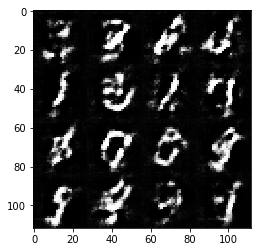

Epoch 1/2... Discriminator Loss: 1.0882... Generator Loss: 1.2834
Epoch 1/2... Discriminator Loss: 1.1091... Generator Loss: 1.2238
Epoch 1/2... Discriminator Loss: 1.1443... Generator Loss: 0.7931
Epoch 1/2... Discriminator Loss: 1.0314... Generator Loss: 1.3980
Epoch 1/2... Discriminator Loss: 1.1442... Generator Loss: 1.1835
Epoch 1/2... Discriminator Loss: 1.1181... Generator Loss: 0.8911
Epoch 1/2... Discriminator Loss: 1.1644... Generator Loss: 1.1304
Epoch 1/2... Discriminator Loss: 1.3009... Generator Loss: 0.8474
Epoch 1/2... Discriminator Loss: 1.2081... Generator Loss: 0.6733
Epoch 1/2... Discriminator Loss: 1.1780... Generator Loss: 1.0061


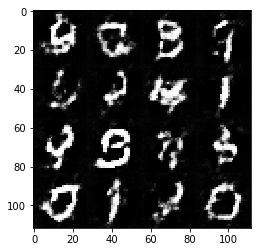

Epoch 1/2... Discriminator Loss: 1.4834... Generator Loss: 0.4472
Epoch 1/2... Discriminator Loss: 1.1060... Generator Loss: 1.1638
Epoch 1/2... Discriminator Loss: 1.2229... Generator Loss: 0.7385
Epoch 1/2... Discriminator Loss: 1.1546... Generator Loss: 1.0621
Epoch 1/2... Discriminator Loss: 1.2037... Generator Loss: 0.8722
Epoch 1/2... Discriminator Loss: 1.1733... Generator Loss: 0.9837
Epoch 1/2... Discriminator Loss: 1.3359... Generator Loss: 0.5620
Epoch 1/2... Discriminator Loss: 1.3379... Generator Loss: 0.6022
Epoch 1/2... Discriminator Loss: 1.2327... Generator Loss: 0.8443
Epoch 1/2... Discriminator Loss: 1.2407... Generator Loss: 0.8099


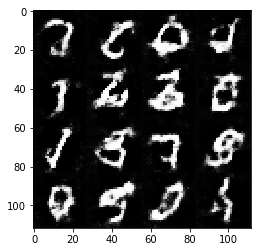

Epoch 1/2... Discriminator Loss: 1.1700... Generator Loss: 0.9968
Epoch 1/2... Discriminator Loss: 1.2729... Generator Loss: 1.1911
Epoch 1/2... Discriminator Loss: 1.2160... Generator Loss: 0.7491
Epoch 1/2... Discriminator Loss: 1.1666... Generator Loss: 0.9762
Epoch 1/2... Discriminator Loss: 1.1848... Generator Loss: 0.8119
Epoch 1/2... Discriminator Loss: 1.3808... Generator Loss: 0.6041
Epoch 1/2... Discriminator Loss: 1.3880... Generator Loss: 0.9904
Epoch 1/2... Discriminator Loss: 1.0586... Generator Loss: 1.1340
Epoch 1/2... Discriminator Loss: 1.2665... Generator Loss: 0.7481
Epoch 1/2... Discriminator Loss: 1.1873... Generator Loss: 1.0321


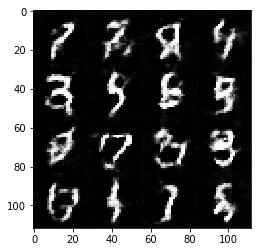

Epoch 1/2... Discriminator Loss: 1.2236... Generator Loss: 0.7767
Epoch 1/2... Discriminator Loss: 1.1567... Generator Loss: 0.8935
Epoch 1/2... Discriminator Loss: 1.2742... Generator Loss: 0.7764
Epoch 2/2... Discriminator Loss: 1.2561... Generator Loss: 0.7416
Epoch 2/2... Discriminator Loss: 1.1784... Generator Loss: 1.2381
Epoch 2/2... Discriminator Loss: 1.2281... Generator Loss: 0.9202
Epoch 2/2... Discriminator Loss: 1.2565... Generator Loss: 0.9886
Epoch 2/2... Discriminator Loss: 1.2719... Generator Loss: 0.7629
Epoch 2/2... Discriminator Loss: 1.2432... Generator Loss: 0.7723
Epoch 2/2... Discriminator Loss: 1.2543... Generator Loss: 0.7730


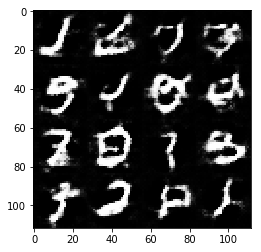

Epoch 2/2... Discriminator Loss: 1.2412... Generator Loss: 0.9025
Epoch 2/2... Discriminator Loss: 1.1511... Generator Loss: 1.0425
Epoch 2/2... Discriminator Loss: 1.2177... Generator Loss: 0.8241
Epoch 2/2... Discriminator Loss: 1.3029... Generator Loss: 1.0583
Epoch 2/2... Discriminator Loss: 1.1548... Generator Loss: 1.0958
Epoch 2/2... Discriminator Loss: 1.2667... Generator Loss: 0.8255
Epoch 2/2... Discriminator Loss: 1.3483... Generator Loss: 0.8240
Epoch 2/2... Discriminator Loss: 1.2043... Generator Loss: 0.9782
Epoch 2/2... Discriminator Loss: 1.2642... Generator Loss: 0.7339
Epoch 2/2... Discriminator Loss: 1.2516... Generator Loss: 0.8331


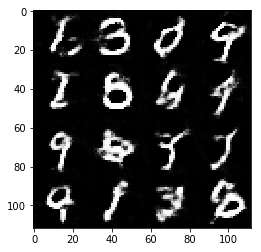

Epoch 2/2... Discriminator Loss: 1.1225... Generator Loss: 1.1534
Epoch 2/2... Discriminator Loss: 1.2081... Generator Loss: 1.1468
Epoch 2/2... Discriminator Loss: 1.1917... Generator Loss: 0.9590
Epoch 2/2... Discriminator Loss: 1.1634... Generator Loss: 1.0164
Epoch 2/2... Discriminator Loss: 1.2574... Generator Loss: 0.6610
Epoch 2/2... Discriminator Loss: 1.2390... Generator Loss: 0.8392
Epoch 2/2... Discriminator Loss: 1.2701... Generator Loss: 0.8431
Epoch 2/2... Discriminator Loss: 1.2832... Generator Loss: 0.7354
Epoch 2/2... Discriminator Loss: 1.2624... Generator Loss: 0.7961
Epoch 2/2... Discriminator Loss: 1.2273... Generator Loss: 0.7302


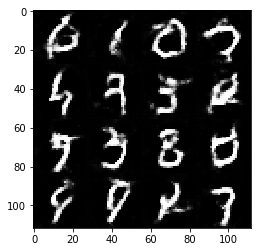

Epoch 2/2... Discriminator Loss: 1.1673... Generator Loss: 0.9070
Epoch 2/2... Discriminator Loss: 1.2372... Generator Loss: 1.0745
Epoch 2/2... Discriminator Loss: 1.3007... Generator Loss: 0.7211
Epoch 2/2... Discriminator Loss: 1.1770... Generator Loss: 0.9025
Epoch 2/2... Discriminator Loss: 1.2872... Generator Loss: 1.1031
Epoch 2/2... Discriminator Loss: 1.2118... Generator Loss: 0.7786
Epoch 2/2... Discriminator Loss: 1.3641... Generator Loss: 0.6521
Epoch 2/2... Discriminator Loss: 1.1930... Generator Loss: 0.7885
Epoch 2/2... Discriminator Loss: 1.1920... Generator Loss: 1.0789
Epoch 2/2... Discriminator Loss: 1.3039... Generator Loss: 0.9123


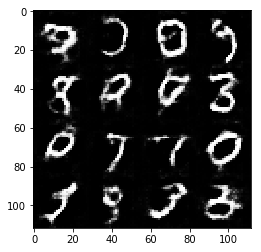

Epoch 2/2... Discriminator Loss: 1.2275... Generator Loss: 0.8562
Epoch 2/2... Discriminator Loss: 1.3448... Generator Loss: 0.9489
Epoch 2/2... Discriminator Loss: 1.2430... Generator Loss: 0.9244
Epoch 2/2... Discriminator Loss: 1.2072... Generator Loss: 0.9426
Epoch 2/2... Discriminator Loss: 1.2528... Generator Loss: 0.8262
Epoch 2/2... Discriminator Loss: 1.2494... Generator Loss: 0.7878
Epoch 2/2... Discriminator Loss: 1.2078... Generator Loss: 0.9997
Epoch 2/2... Discriminator Loss: 1.1870... Generator Loss: 0.8530
Epoch 2/2... Discriminator Loss: 1.2833... Generator Loss: 0.8286
Epoch 2/2... Discriminator Loss: 1.3341... Generator Loss: 0.9159


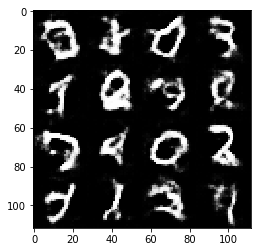

Epoch 2/2... Discriminator Loss: 1.2407... Generator Loss: 0.7591
Epoch 2/2... Discriminator Loss: 1.2889... Generator Loss: 0.9137
Epoch 2/2... Discriminator Loss: 1.3742... Generator Loss: 0.6947
Epoch 2/2... Discriminator Loss: 1.1688... Generator Loss: 1.0478
Epoch 2/2... Discriminator Loss: 1.2230... Generator Loss: 0.8471
Epoch 2/2... Discriminator Loss: 1.2343... Generator Loss: 0.8065
Epoch 2/2... Discriminator Loss: 1.2434... Generator Loss: 0.8915
Epoch 2/2... Discriminator Loss: 1.2557... Generator Loss: 0.9045
Epoch 2/2... Discriminator Loss: 1.2040... Generator Loss: 0.8236
Epoch 2/2... Discriminator Loss: 1.1010... Generator Loss: 1.1113


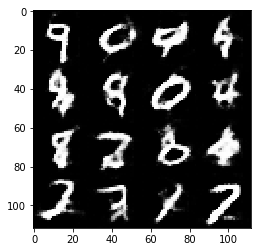

Epoch 2/2... Discriminator Loss: 1.2593... Generator Loss: 0.7270
Epoch 2/2... Discriminator Loss: 1.2043... Generator Loss: 0.7408
Epoch 2/2... Discriminator Loss: 1.1859... Generator Loss: 0.9206
Epoch 2/2... Discriminator Loss: 1.1654... Generator Loss: 1.0807
Epoch 2/2... Discriminator Loss: 1.1388... Generator Loss: 1.0407
Epoch 2/2... Discriminator Loss: 1.3040... Generator Loss: 1.0147
Epoch 2/2... Discriminator Loss: 1.2889... Generator Loss: 0.9332
Epoch 2/2... Discriminator Loss: 1.2768... Generator Loss: 1.0342
Epoch 2/2... Discriminator Loss: 1.3070... Generator Loss: 0.7304
Epoch 2/2... Discriminator Loss: 1.2297... Generator Loss: 0.9618


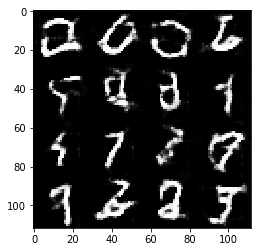

Epoch 2/2... Discriminator Loss: 1.2433... Generator Loss: 0.9116
Epoch 2/2... Discriminator Loss: 1.2350... Generator Loss: 1.0867
Epoch 2/2... Discriminator Loss: 1.2735... Generator Loss: 0.8089
Epoch 2/2... Discriminator Loss: 1.2410... Generator Loss: 0.8370
Epoch 2/2... Discriminator Loss: 1.2285... Generator Loss: 0.8559
Epoch 2/2... Discriminator Loss: 1.1981... Generator Loss: 0.8685
Epoch 2/2... Discriminator Loss: 1.1712... Generator Loss: 0.8631
Epoch 2/2... Discriminator Loss: 1.2914... Generator Loss: 1.2270
Epoch 2/2... Discriminator Loss: 1.2355... Generator Loss: 0.8171
Epoch 2/2... Discriminator Loss: 1.2235... Generator Loss: 0.8350


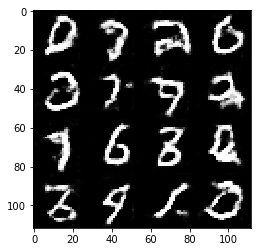

Epoch 2/2... Discriminator Loss: 1.2193... Generator Loss: 1.0625
Epoch 2/2... Discriminator Loss: 1.2376... Generator Loss: 0.8820
Epoch 2/2... Discriminator Loss: 1.2823... Generator Loss: 0.7151
Epoch 2/2... Discriminator Loss: 1.2989... Generator Loss: 0.8991
Epoch 2/2... Discriminator Loss: 1.1950... Generator Loss: 1.1436
Epoch 2/2... Discriminator Loss: 1.1806... Generator Loss: 1.2288
Epoch 2/2... Discriminator Loss: 1.2062... Generator Loss: 0.8337
Epoch 2/2... Discriminator Loss: 1.3885... Generator Loss: 0.5362
Epoch 2/2... Discriminator Loss: 1.0784... Generator Loss: 0.8211
Epoch 2/2... Discriminator Loss: 1.1043... Generator Loss: 1.1144


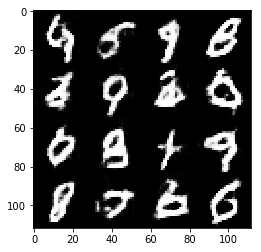

Epoch 2/2... Discriminator Loss: 1.2384... Generator Loss: 1.0906
Epoch 2/2... Discriminator Loss: 1.2529... Generator Loss: 0.7926
Epoch 2/2... Discriminator Loss: 1.2442... Generator Loss: 0.7704
Epoch 2/2... Discriminator Loss: 1.1391... Generator Loss: 0.9510
Epoch 2/2... Discriminator Loss: 1.1888... Generator Loss: 0.9493
Epoch 2/2... Discriminator Loss: 1.1971... Generator Loss: 1.0133
Epoch 2/2... Discriminator Loss: 1.1507... Generator Loss: 0.9639


In [14]:
batch_size = 64
z_dim = 128
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.0645... Generator Loss: 0.3346
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.7092
Epoch 1/1... Discriminator Loss: 1.4638... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.5215
Epoch 1/1... Discriminator Loss: 0.9927... Generator Loss: 1.1222
Epoch 1/1... Discriminator Loss: 0.8602... Generator Loss: 1.2673
Epoch 1/1... Discriminator Loss: 0.7929... Generator Loss: 1.9385
Epoch 1/1... Discriminator Loss: 1.0675... Generator Loss: 2.7177
Epoch 1/1... Discriminator Loss: 0.7548... Generator Loss: 1.7747
Epoch 1/1... Discriminator Loss: 0.6941... Generator Loss: 1.9367


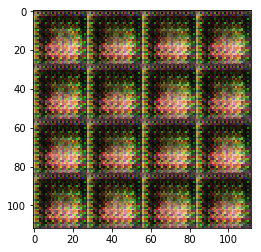

Epoch 1/1... Discriminator Loss: 0.7446... Generator Loss: 1.4961
Epoch 1/1... Discriminator Loss: 1.0587... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 0.8714... Generator Loss: 1.2001
Epoch 1/1... Discriminator Loss: 1.1547... Generator Loss: 0.8892
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 1.4094
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 1.1544
Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 1.1906
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 1.8184
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 1.0555


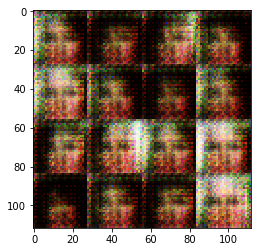

Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 1.2536
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.8361
Epoch 1/1... Discriminator Loss: 1.0798... Generator Loss: 1.6143
Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 1.0472
Epoch 1/1... Discriminator Loss: 1.2557... Generator Loss: 1.2382
Epoch 1/1... Discriminator Loss: 1.2922... Generator Loss: 1.0402
Epoch 1/1... Discriminator Loss: 1.3923... Generator Loss: 1.2405
Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 0.8191
Epoch 1/1... Discriminator Loss: 1.4114... Generator Loss: 1.4247
Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 1.0838


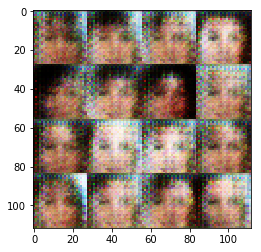

Epoch 1/1... Discriminator Loss: 1.2362... Generator Loss: 1.2927
Epoch 1/1... Discriminator Loss: 1.0099... Generator Loss: 1.4131
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 1.1054
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.8049
Epoch 1/1... Discriminator Loss: 1.1747... Generator Loss: 0.8752
Epoch 1/1... Discriminator Loss: 1.2243... Generator Loss: 1.1083
Epoch 1/1... Discriminator Loss: 1.2912... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 1.3178... Generator Loss: 0.7672
Epoch 1/1... Discriminator Loss: 1.5365... Generator Loss: 0.4954
Epoch 1/1... Discriminator Loss: 1.0378... Generator Loss: 1.1576


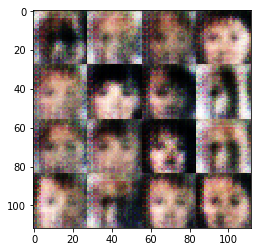

Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.9659
Epoch 1/1... Discriminator Loss: 1.2125... Generator Loss: 0.8803
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.8293
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.9886
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.8430
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 1.4844
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 1.4133
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.6926
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.7160
Epoch 1/1... Discriminator Loss: 1.2658... Generator Loss: 0.8027


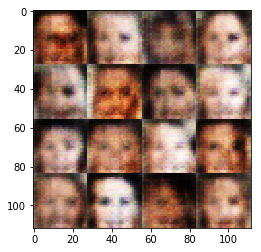

Epoch 1/1... Discriminator Loss: 1.6645... Generator Loss: 0.4066
Epoch 1/1... Discriminator Loss: 1.5749... Generator Loss: 0.4609
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.7767
Epoch 1/1... Discriminator Loss: 1.1457... Generator Loss: 1.6320
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.6701
Epoch 1/1... Discriminator Loss: 1.2215... Generator Loss: 1.0464
Epoch 1/1... Discriminator Loss: 1.8286... Generator Loss: 0.2970
Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.9161
Epoch 1/1... Discriminator Loss: 1.2453... Generator Loss: 0.8676
Epoch 1/1... Discriminator Loss: 1.3277... Generator Loss: 1.1061


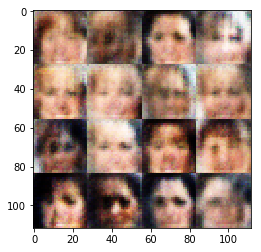

Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.4572... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.4838... Generator Loss: 0.5423
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.7469
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.7523
Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 1.1541
Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.8972
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.9236
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 0.7026


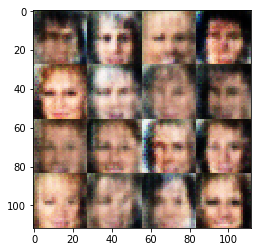

Epoch 1/1... Discriminator Loss: 1.4170... Generator Loss: 1.0540
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 0.9523
Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.7958
Epoch 1/1... Discriminator Loss: 1.3278... Generator Loss: 0.8268
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.9262
Epoch 1/1... Discriminator Loss: 1.5950... Generator Loss: 1.3347
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.8791
Epoch 1/1... Discriminator Loss: 1.4318... Generator Loss: 0.6358


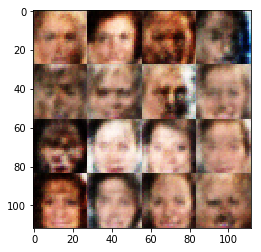

Epoch 1/1... Discriminator Loss: 1.4193... Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 1.4060... Generator Loss: 0.9793
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 1.3347... Generator Loss: 0.9178
Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 1.0249
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.8871
Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.8104
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 0.9723


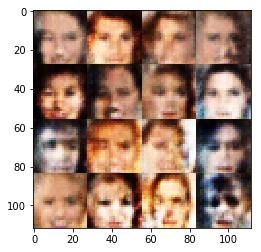

Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 0.9389
Epoch 1/1... Discriminator Loss: 1.1920... Generator Loss: 0.9090
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.9058
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 0.9352
Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.2765... Generator Loss: 0.9523
Epoch 1/1... Discriminator Loss: 1.2309... Generator Loss: 0.9829
Epoch 1/1... Discriminator Loss: 1.3172... Generator Loss: 0.6322
Epoch 1/1... Discriminator Loss: 1.4968... Generator Loss: 0.8596
Epoch 1/1... Discriminator Loss: 1.4236... Generator Loss: 0.6937


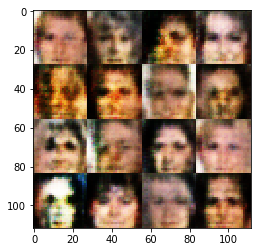

Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.8059
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.7839
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.8858
Epoch 1/1... Discriminator Loss: 1.3979... Generator Loss: 0.9118
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.5403
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.6658
Epoch 1/1... Discriminator Loss: 1.3625... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.9139
Epoch 1/1... Discriminator Loss: 1.1654... Generator Loss: 1.0195


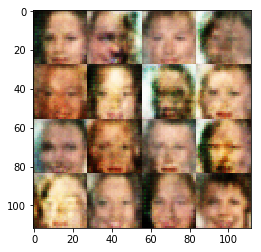

Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.8764
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.6054
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.7665
Epoch 1/1... Discriminator Loss: 1.2471... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 0.8215
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.5195... Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.8291
Epoch 1/1... Discriminator Loss: 1.4883... Generator Loss: 0.4741


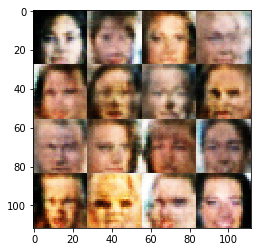

Epoch 1/1... Discriminator Loss: 1.2797... Generator Loss: 0.9347
Epoch 1/1... Discriminator Loss: 1.5248... Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 1.3692... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 1.3315... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 1.3788... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 0.7276
Epoch 1/1... Discriminator Loss: 1.2792... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.8611
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.7782


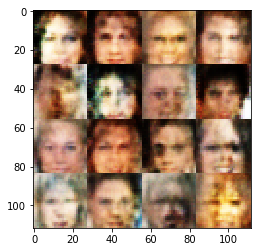

Epoch 1/1... Discriminator Loss: 1.3325... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 1.3368... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.9906
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.7705
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 1.3773... Generator Loss: 0.7971
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.8886
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.8391
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.9400


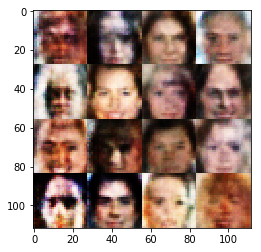

Epoch 1/1... Discriminator Loss: 1.3771... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.3035... Generator Loss: 0.8659
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.8159
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.9878
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 1.1974... Generator Loss: 1.0778
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.7442


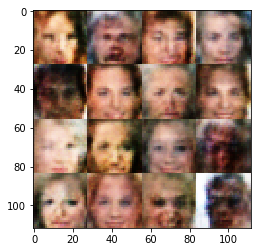

Epoch 1/1... Discriminator Loss: 1.1834... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 1.5724... Generator Loss: 1.0940
Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 0.8720
Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 0.7572
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.7579
Epoch 1/1... Discriminator Loss: 1.3417... Generator Loss: 0.8714
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.3601... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.8252
Epoch 1/1... Discriminator Loss: 1.2268... Generator Loss: 1.0191


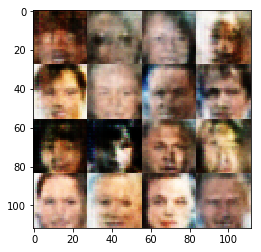

Epoch 1/1... Discriminator Loss: 1.2648... Generator Loss: 0.8534
Epoch 1/1... Discriminator Loss: 1.3131... Generator Loss: 1.0861
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.7985
Epoch 1/1... Discriminator Loss: 1.4333... Generator Loss: 0.7922
Epoch 1/1... Discriminator Loss: 1.3003... Generator Loss: 0.9101
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 1.0612
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.8960
Epoch 1/1... Discriminator Loss: 1.2512... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 1.4057... Generator Loss: 0.7794


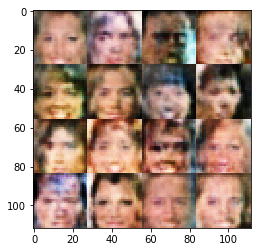

Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.7714
Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 0.8792
Epoch 1/1... Discriminator Loss: 1.3539... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 1.2800... Generator Loss: 0.8304
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7000
Epoch 1/1... Discriminator Loss: 1.3432... Generator Loss: 0.8016
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 1.3348... Generator Loss: 0.8229
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.8658


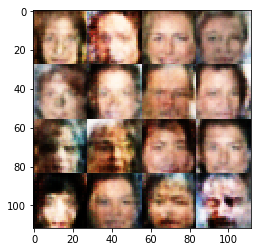

Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 1.5029... Generator Loss: 0.5717
Epoch 1/1... Discriminator Loss: 1.3689... Generator Loss: 0.8139
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.7484
Epoch 1/1... Discriminator Loss: 1.4646... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 1.4537... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.7482
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.7961
Epoch 1/1... Discriminator Loss: 1.5335... Generator Loss: 0.6625


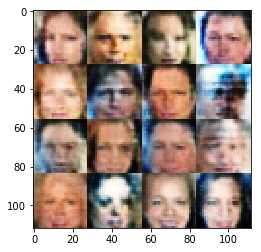

Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.6739
Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 0.8235
Epoch 1/1... Discriminator Loss: 1.6621... Generator Loss: 0.3995
Epoch 1/1... Discriminator Loss: 1.3011... Generator Loss: 0.9353
Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.8795
Epoch 1/1... Discriminator Loss: 1.3790... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 1.5564... Generator Loss: 0.6090
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.9035
Epoch 1/1... Discriminator Loss: 1.3172... Generator Loss: 0.8920
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.8380


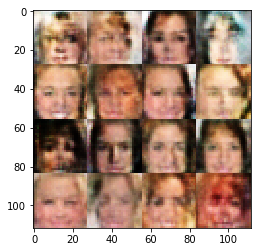

Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.7214
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 1.5444... Generator Loss: 1.1666
Epoch 1/1... Discriminator Loss: 1.3563... Generator Loss: 0.8456
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.7993
Epoch 1/1... Discriminator Loss: 1.4472... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.7500
Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.7943


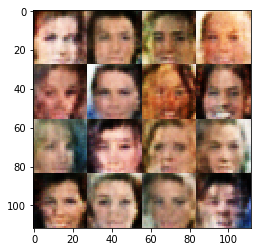

Epoch 1/1... Discriminator Loss: 1.3110... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.8950
Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.7323
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.7751
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 0.8625
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.8461
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.9747
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.5688
Epoch 1/1... Discriminator Loss: 1.4056... Generator Loss: 0.5501
Epoch 1/1... Discriminator Loss: 1.3598... Generator Loss: 0.8749


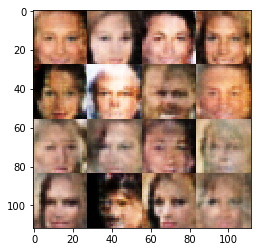

Epoch 1/1... Discriminator Loss: 1.3291... Generator Loss: 0.8449
Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.4982
Epoch 1/1... Discriminator Loss: 1.4388... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 1.4273... Generator Loss: 0.7284
Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.3318... Generator Loss: 0.8701
Epoch 1/1... Discriminator Loss: 1.3860... Generator Loss: 0.7280


KeyboardInterrupt: 

In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.